In [2]:
import pandas as pd
import numpy as np
import calendar
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import datetime
import re
pd.options.display.max_columns = None

In [21]:
from collections import Counter
from fuzzywuzzy import process, fuzz
import pickle
import missingno as msno

c:\Users\pedro\anaconda3\envs\ironhack\lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


### I´ve taken this CSV from Kaggle.com

In [22]:
data = pd.read_csv("../csv/nasa_exoplanets.csv")
data.head()

,row,name,light_years_from_earth,planet_mass,stellar_magnitude,discovery_date,planet_type,planet_radius,orbital_radius,orbital_period,eccentricity,solar_system_name,planet_discovery_method,planet_orbital_inclination,planet_density,right_ascension,declination,host_temperature,host_mass,host_radius
0,0,11 Comae Berenices b,305.0,19.4 Jupiters,4.740,2007,Gas Giant,1.08 x Jupiter,1.29 AU,326 days,0.23,11 Com,Radial Velocity,NaN,NaN,12h20m43.03s,+17d47m34.3s,4742.0,2.70,19.00
1,1,11 Ursae Minoris b,410.0,14.74 Jupiters,5.016,2009,Gas Giant,1.09 x Jupiter,1.53 AU,1.4 years,0.08,11 UMi,Radial Velocity,NaN,NaN,15h17m05.89s,+71d49m26.0s,4213.0,2.78,29.79
2,2,14 Andromedae b,247.0,4.8 Jupiters,5.227,2008,Gas Giant,1.15 x Jupiter,0.83 AU,185.8 days,0,14 And,Radial Velocity,NaN,NaN,23h31m17.42s,+39d14m10.3s,4813.0,2.20,11.00
3,3,14 Herculis b,59.0,4.66 Jupiters,6.610,2002,Gas Giant,1.15 x Jupiter,2.93 AU,4.9 years,0.37,14 Her,Radial Velocity,NaN,NaN,16h10m24.31s,+43d49m03.5s,5338.0,0.90,0.93
4,4,16 Cygni B b,69.0,1.78 Jupiters,6.250,1996,Gas Giant,1.2 x Jupiter,1.66 AU,2.2 years,0.68,16 Cyg B,Radial Velocity,NaN,NaN,19h41m51.97s,+50d31m03.1s,5750.0,1.08,1.13


In [5]:
data.shape , data.size

((4284, 20), 85680)

In [6]:
data.columns

Index(['row', 'name', 'light_years_from_earth', 'planet_mass',
       'stellar_magnitude', 'discovery_date', 'planet_type', 'planet_radius',
       'orbital_radius', 'orbital_period', 'eccentricity', 'solar_system_name',
       'planet_discovery_method', 'planet_orbital_inclination',
       'planet_density', 'right_ascension', 'declination', 'host_temperature',
       'host_mass', 'host_radius'],
      dtype='object')

In [23]:
new_columns = [i.replace("_"," " ) for i in data.columns]
data.columns = new_columns
data.head(5)

,row,name,light years from earth,planet mass,stellar magnitude,discovery date,planet type,planet radius,orbital radius,orbital period,eccentricity,solar system name,planet discovery method,planet orbital inclination,planet density,right ascension,declination,host temperature,host mass,host radius
0,0,11 Comae Berenices b,305.0,19.4 Jupiters,4.740,2007,Gas Giant,1.08 x Jupiter,1.29 AU,326 days,0.23,11 Com,Radial Velocity,NaN,NaN,12h20m43.03s,+17d47m34.3s,4742.0,2.70,19.00
1,1,11 Ursae Minoris b,410.0,14.74 Jupiters,5.016,2009,Gas Giant,1.09 x Jupiter,1.53 AU,1.4 years,0.08,11 UMi,Radial Velocity,NaN,NaN,15h17m05.89s,+71d49m26.0s,4213.0,2.78,29.79
2,2,14 Andromedae b,247.0,4.8 Jupiters,5.227,2008,Gas Giant,1.15 x Jupiter,0.83 AU,185.8 days,0,14 And,Radial Velocity,NaN,NaN,23h31m17.42s,+39d14m10.3s,4813.0,2.20,11.00
3,3,14 Herculis b,59.0,4.66 Jupiters,6.610,2002,Gas Giant,1.15 x Jupiter,2.93 AU,4.9 years,0.37,14 Her,Radial Velocity,NaN,NaN,16h10m24.31s,+43d49m03.5s,5338.0,0.90,0.93
4,4,16 Cygni B b,69.0,1.78 Jupiters,6.250,1996,Gas Giant,1.2 x Jupiter,1.66 AU,2.2 years,0.68,16 Cyg B,Radial Velocity,NaN,NaN,19h41m51.97s,+50d31m03.1s,5750.0,1.08,1.13


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4284 entries, 0 to 4283
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   row                         4284 non-null   int64  
 1   name                        4284 non-null   object 
 2   light years from earth      4274 non-null   float64
 3   planet mass                 4284 non-null   object 
 4   stellar magnitude           4176 non-null   float64
 5   discovery date              4284 non-null   int64  
 6   planet type                 4284 non-null   object 
 7   planet radius               4284 non-null   object 
 8   orbital radius              4284 non-null   object 
 9   orbital period              4284 non-null   object 
 10  eccentricity                4284 non-null   object 
 11  solar system name           4284 non-null   object 
 12  planet discovery method     4284 non-null   object 
 13  planet orbital inclination  946 n

<AxesSubplot: >

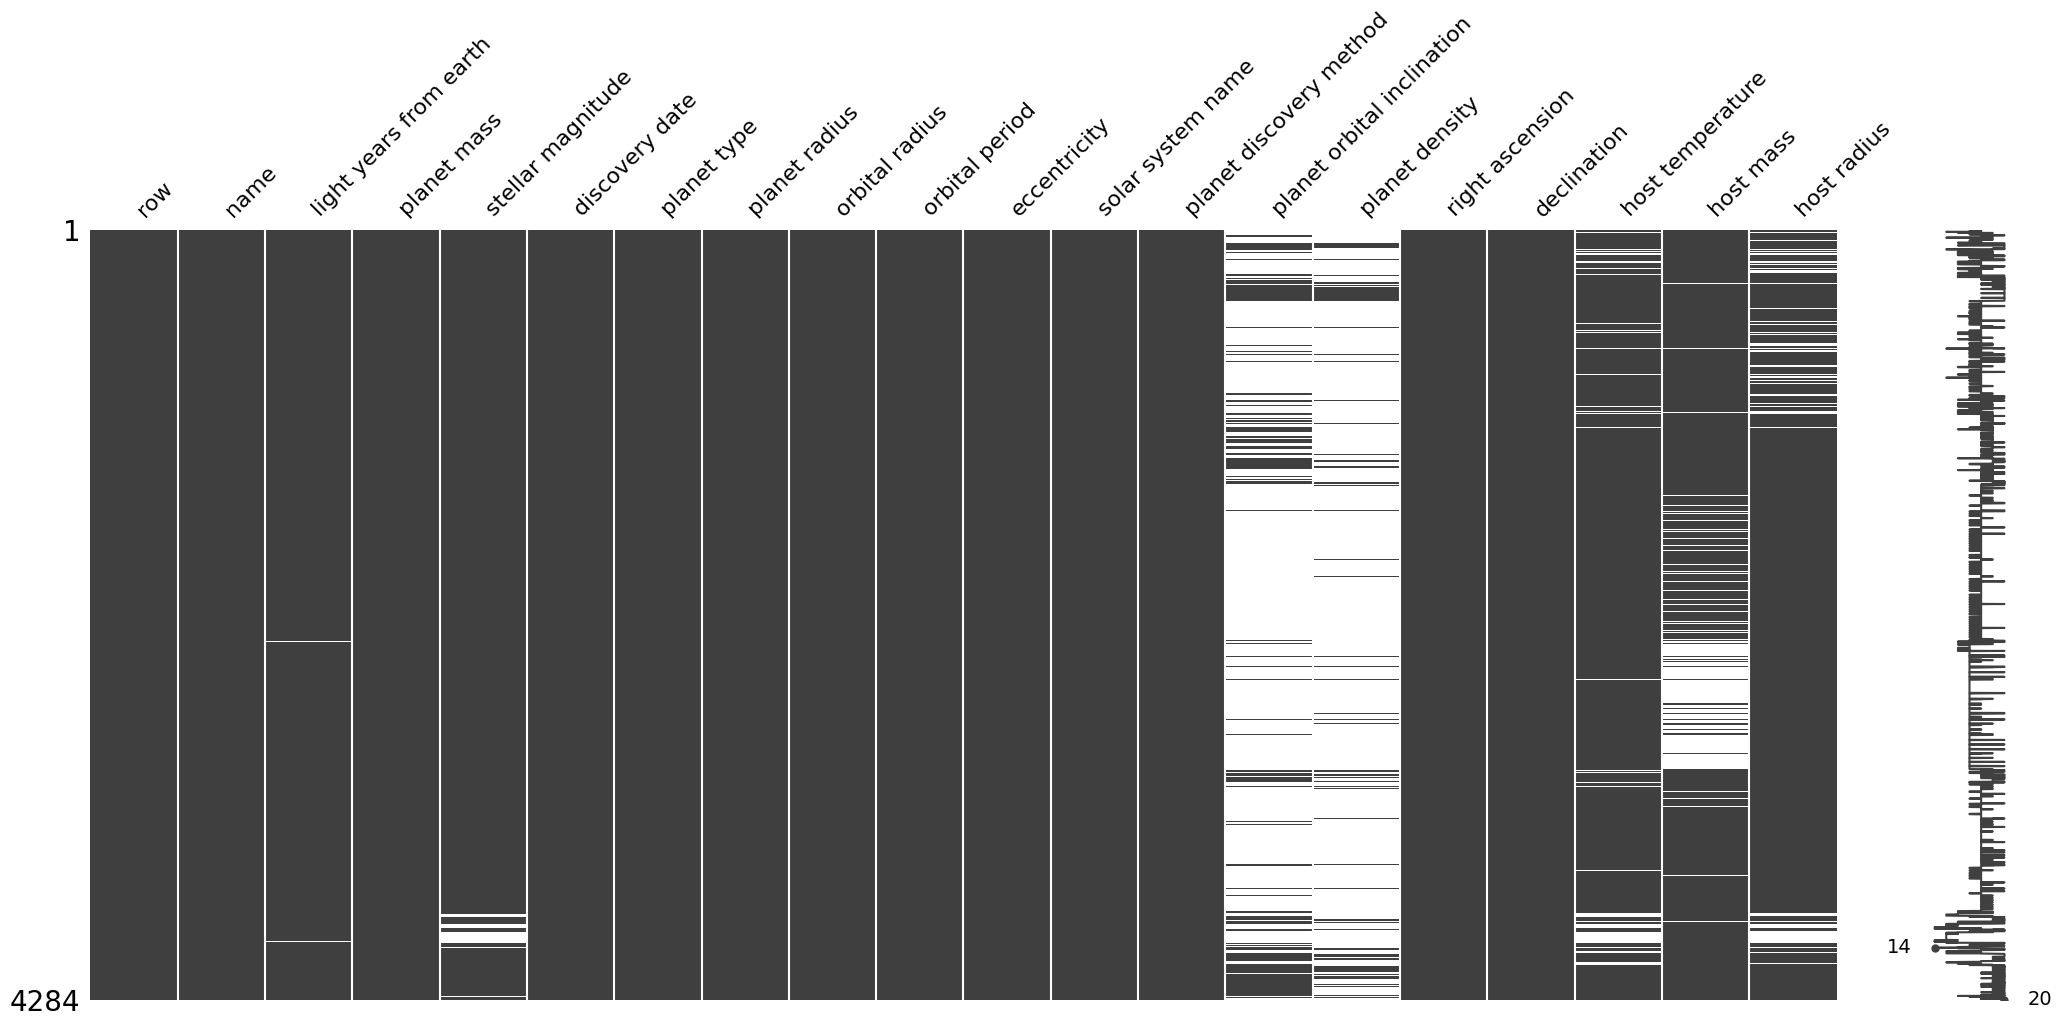

In [25]:
msno.matrix(data)

In [10]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
row,4284.0,2141.500000,1236.828606,0.00,1070.750,2141.500,3212.250,4283.00
light years from earth,4274.0,2079.077211,2824.073667,4.00,472.000,1508.500,2808.000,27727.00
stellar magnitude,4176.0,12.672183,2.939887,0.85,11.368,13.563,14.893,20.48
discovery date,4284.0,2014.494398,3.805291,1989.00,2014.000,2016.000,2016.000,2020.00
planet orbital inclination,946.0,86.588073,8.056270,7.70,86.200,88.165,89.300,140.00
planet density,548.0,2.542119,4.957521,0.03,0.434,1.020,2.825,77.70
host temperature,4009.0,5477.342537,1744.233210,575.00,5003.750,5588.000,5919.000,57000.00
host mass,3474.0,0.985947,0.516456,0.01,0.800,0.960,1.120,10.94
host radius,3889.0,1.539259,3.866147,0.01,0.790,0.970,1.250,83.80


In [11]:
data.describe(include = "object").T

,count,unique,top,freq
name,4284,4264,K2-158 c,2
planet mass,4284,1613,Unknown,24
planet type,4284,5,Neptune-like,1457
planet radius,4284,988,1.18 x Jupiter,52
orbital radius,4284,1609,Unknown,1561
orbital period,4284,1132,3.3 days,45
eccentricity,4284,207,0,2973
solar system name,4284,3185,KOI-351,8
planet discovery method,4284,11,Transit,3261
right ascension,4284,3181,18h57m44.04s,8


In [26]:
data.describe(include = "all").T.head(10)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
row,4284.0,NaN,NaN,NaN,2141.5,1236.828606,0.0,1070.75,2141.5,3212.25,4283.0
name,4284,4264,K2-158 c,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
light years from earth,4274.0,NaN,NaN,NaN,2079.077211,2824.073667,4.0,472.0,1508.5,2808.0,27727.0
planet mass,4284,1613,Unknown,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN
stellar magnitude,4176.0,NaN,NaN,NaN,12.672183,2.939887,0.85,11.368,13.563,14.893,20.48
discovery date,4284.0,NaN,NaN,NaN,2014.494398,3.805291,1989.0,2014.0,2016.0,2016.0,2020.0
planet type,4284,5,Neptune-like,1457,NaN,NaN,NaN,NaN,NaN,NaN,NaN
planet radius,4284,988,1.18 x Jupiter,52,NaN,NaN,NaN,NaN,NaN,NaN,NaN
orbital radius,4284,1609,Unknown,1561,NaN,NaN,NaN,NaN,NaN,NaN,NaN
orbital period,4284,1132,3.3 days,45,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##### After analize de data base i've notice that columns 'planet orbital inclination' and 'planet density' have 78% and 87% nulls data, probably the best option is delete this columns, not many information to extract.

In [28]:
data.drop((["planet orbital inclination" ,"planet density"]), axis = 1, inplace = True)

In [29]:
data.head()

,row,name,light years from earth,planet mass,stellar magnitude,discovery date,planet type,planet radius,orbital radius,orbital period,eccentricity,solar system name,planet discovery method,right ascension,declination,host temperature,host mass,host radius
0,0,11 Comae Berenices b,305.0,19.4 Jupiters,4.740,2007,Gas Giant,1.08 x Jupiter,1.29 AU,326 days,0.23,11 Com,Radial Velocity,12h20m43.03s,+17d47m34.3s,4742.0,2.70,19.00
1,1,11 Ursae Minoris b,410.0,14.74 Jupiters,5.016,2009,Gas Giant,1.09 x Jupiter,1.53 AU,1.4 years,0.08,11 UMi,Radial Velocity,15h17m05.89s,+71d49m26.0s,4213.0,2.78,29.79
2,2,14 Andromedae b,247.0,4.8 Jupiters,5.227,2008,Gas Giant,1.15 x Jupiter,0.83 AU,185.8 days,0,14 And,Radial Velocity,23h31m17.42s,+39d14m10.3s,4813.0,2.20,11.00
3,3,14 Herculis b,59.0,4.66 Jupiters,6.610,2002,Gas Giant,1.15 x Jupiter,2.93 AU,4.9 years,0.37,14 Her,Radial Velocity,16h10m24.31s,+43d49m03.5s,5338.0,0.90,0.93
4,4,16 Cygni B b,69.0,1.78 Jupiters,6.250,1996,Gas Giant,1.2 x Jupiter,1.66 AU,2.2 years,0.68,16 Cyg B,Radial Velocity,19h41m51.97s,+50d31m03.1s,5750.0,1.08,1.13


### Let´s start clean up the database.

In [31]:
data["light years from earth"].median()

1508.5

In [32]:
data["light years from earth"].mean()

2079.077211043519

### there is a big difference between the mean and the median so i did the mean between them becouse i dont know wich one to choose.

In [33]:
data["light years from earth"].replace(np.nan,((data["light years from earth"].mean()+ data["light years from earth"].median())/2), inplace = True )

### for stellar magnitude mean and median is really similar so i will use median

In [34]:
data["stellar magnitude"].replace(np.nan, data["stellar magnitude"].median(), inplace = True)

### For host temperature i will use the median too
hacer una funcion para esto

In [36]:
data["host temperature"].replace(np.nan, data["host temperature"].median(), inplace = True)

In [37]:
data["host mass"].replace(np.nan, data["host mass"].median(), inplace = True)

In [38]:
data["host radius"].replace(np.nan, data["host radius"].median(), inplace = True)

<AxesSubplot: >

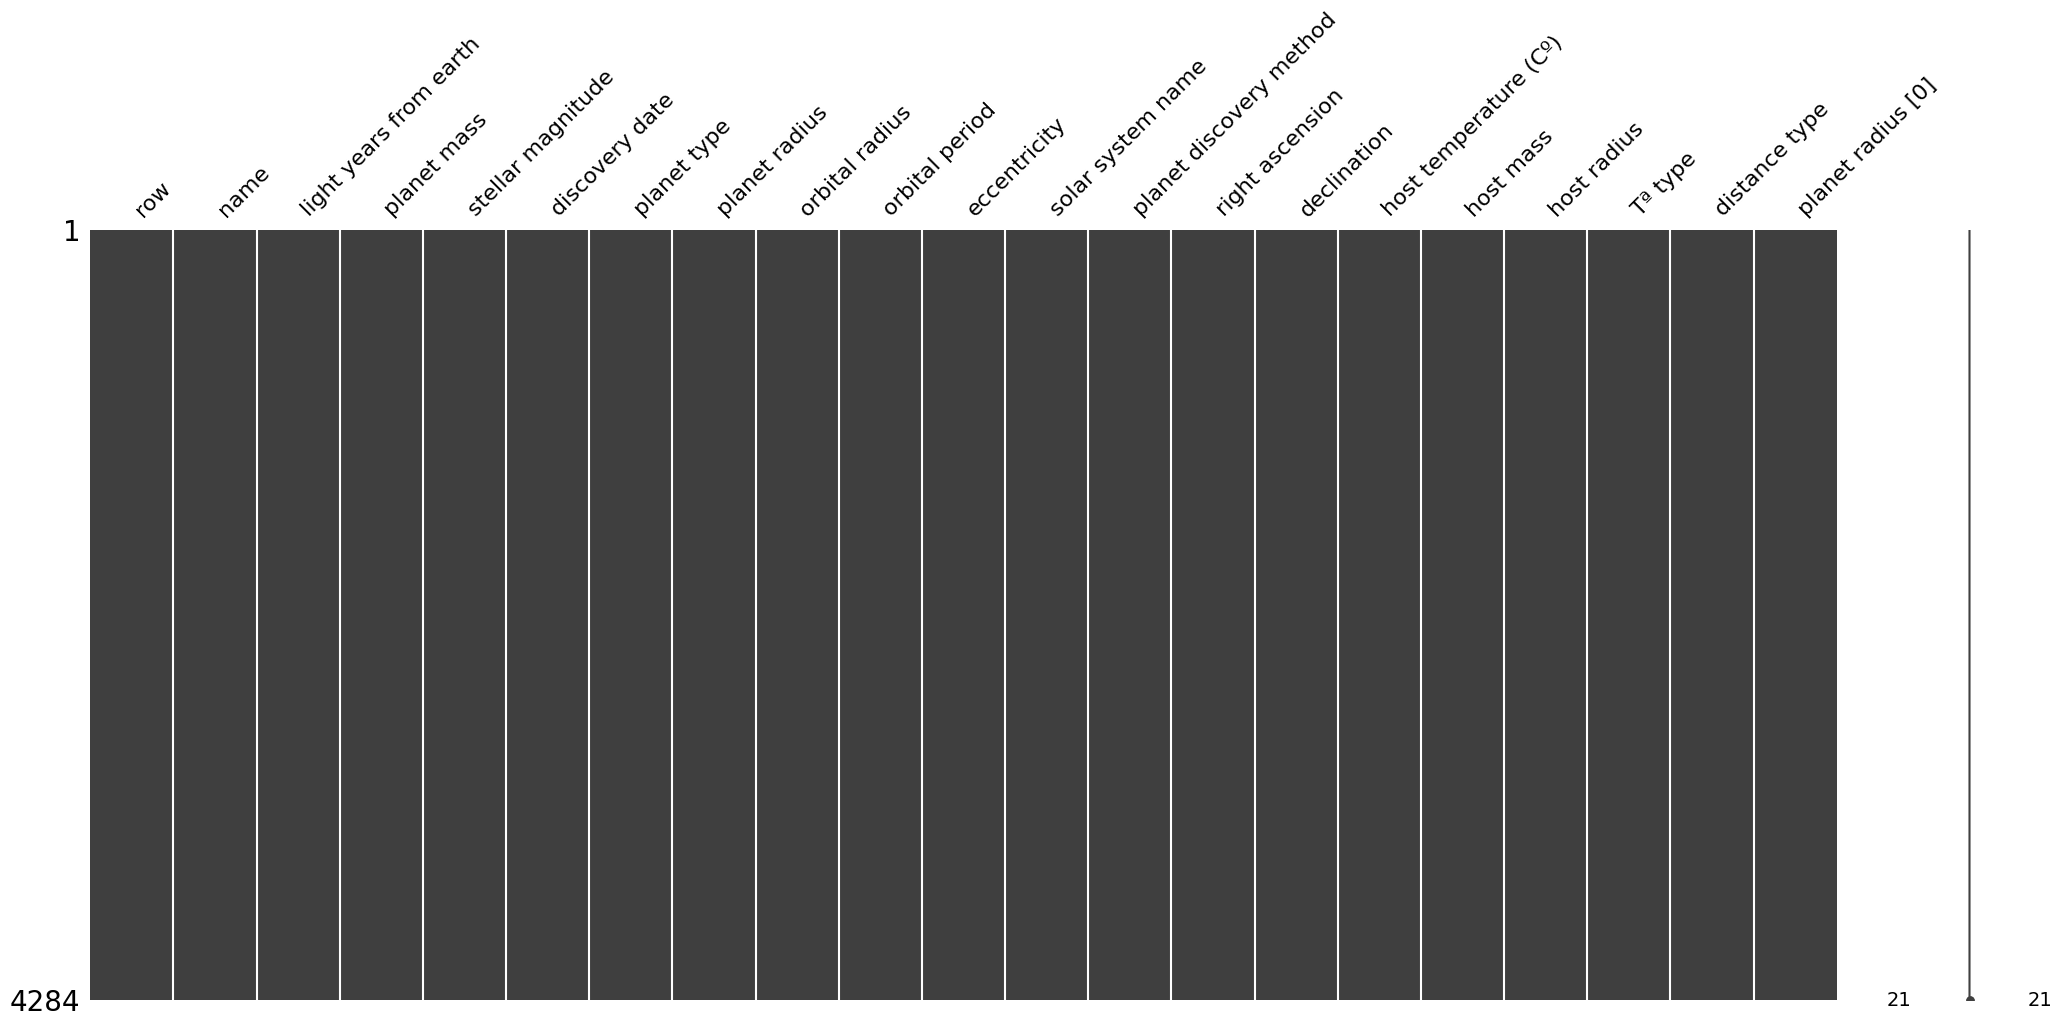

In [86]:
msno.matrix(data)

##### The temperature is in Fareheid degrees i'm going to convert it in celsius degrees.

#### Cº = ((F -32)5)*9

In [40]:
data.rename(columns = {"host temperature" : "host temperature (Cº)"}, inplace = True)

In [41]:
data['host temperature (Cº)'] = data['host temperature (Cº)'].astype(int)

In [42]:
listaT = [] 
listaT

[]

In [43]:
"""lev voy a restar Tº para que me de mas juego"""
for i in data['host temperature (Cº)']:
    i = ((i - 32)*5)/9 - 380
    listaT.append(i)

In [44]:
data['host temperature (Cº)'] = listaT

In [45]:
data.head()

,row,name,light years from earth,planet mass,stellar magnitude,discovery date,planet type,planet radius,orbital radius,orbital period,eccentricity,solar system name,planet discovery method,right ascension,declination,host temperature (Cº),host mass,host radius
0,0,11 Comae Berenices b,305.0,19.4 Jupiters,4.740,2007,Gas Giant,1.08 x Jupiter,1.29 AU,326 days,0.23,11 Com,Radial Velocity,12h20m43.03s,+17d47m34.3s,2236.666667,2.70,19.00
1,1,11 Ursae Minoris b,410.0,14.74 Jupiters,5.016,2009,Gas Giant,1.09 x Jupiter,1.53 AU,1.4 years,0.08,11 UMi,Radial Velocity,15h17m05.89s,+71d49m26.0s,1942.777778,2.78,29.79
2,2,14 Andromedae b,247.0,4.8 Jupiters,5.227,2008,Gas Giant,1.15 x Jupiter,0.83 AU,185.8 days,0,14 And,Radial Velocity,23h31m17.42s,+39d14m10.3s,2276.111111,2.20,11.00
3,3,14 Herculis b,59.0,4.66 Jupiters,6.610,2002,Gas Giant,1.15 x Jupiter,2.93 AU,4.9 years,0.37,14 Her,Radial Velocity,16h10m24.31s,+43d49m03.5s,2567.777778,0.90,0.93
4,4,16 Cygni B b,69.0,1.78 Jupiters,6.250,1996,Gas Giant,1.2 x Jupiter,1.66 AU,2.2 years,0.68,16 Cyg B,Radial Velocity,19h41m51.97s,+50d31m03.1s,2796.666667,1.08,1.13


### lets divide planets by temperature type( cold, hot, very hot)

In [46]:
Ttype = []

In [47]:
data["host temperature (Cº)"].describe()

count     4284.000000
mean      2649.132690
std        937.515543
min        -78.333333
25%       2414.583333
50%       2706.666667
75%       2880.000000
max      31268.888889
Name: host temperature (Cº), dtype: float64

In [48]:
for i in data["host temperature (Cº)"]:
    if i <= 10:
        Ttype.append("frío")
    if i > 10 and i <= 150:
        Ttype.append("caliente")
    if i > 151:
        Ttype.append("muy caliente")

        
        

In [53]:
data["Tª type"] = Ttype

In [54]:
data["Tª type"].unique()

array(['muy caliente', 'frío'], dtype=object)

In [64]:
 data[data["Tª type"] == "frío"]



,row,name,light years from earth,planet mass,stellar magnitude,discovery date,planet type,planet radius,orbital radius,orbital period,eccentricity,solar system name,planet discovery method,right ascension,declination,host temperature (Cº),host mass,host radius,Tª type
70,70,CFBDSIR J145829+101343 b,75.0,10.5 Jupiters,13.563,2011,Gas Giant,1.11 x Jupiter,2.6 AU,27.5 years,0,CFBDSIR J145829+101343,Imaging,14h58m29.00s,+10d13m43.0s,-75.555556,0.02,0.97,frío
4264,4264,WISEP J121756.91+162640.2 A b,33.0,22 Jupiters,13.563,2012,Gas Giant,0.934 x Jupiter,8.0 AU,130.7 years,0,WISEP J121756.91+162640.2 A,Imaging,12h17m56.91s,+16d26m40.2s,-78.333333,0.03,0.09,frío


### lets do something similar with "light years from earth"

In [66]:
data["light years from earth"].describe().T

count     4284.000000
mean      2078.411271
std       2820.808504
min          4.000000
25%        473.000000
50%       1514.000000
75%       2805.750000
max      27727.000000
Name: light years from earth, dtype: float64

In [67]:
Dtype = []

In [68]:
for i in data["light years from earth"]:
    if i <= 25:
        Dtype.append("cerca")
    if i >= 25 and i <= 500:
        Dtype.append("lejos")
    if i >= 501:
        Dtype.append("criogenia")

In [33]:
len(Dtype)

4284

In [34]:
data["light years from earth"].size

4284

In [69]:
data["distance type"] = Dtype

In [ ]:
data.head()

In [71]:
data.to_csv("../csv/nasa_exoplanets_limpio.csv")

### Lets take the radius index so we can work with it

In [70]:
data1 = data

In [15]:
data1["planet radius"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 4284 entries, 0 to 4283
Series name: planet radius
Non-Null Count  Dtype 
--------------  ----- 
4284 non-null   object
dtypes: object(1)
memory usage: 33.6+ KB


In [16]:
listaPlanet = data1["planet radius"].str.split(" ")[:][0]

In [17]:
listaPlanet[:]

['1.08', 'x', 'Jupiter']

In [18]:
def limpiar_radio(i):
    return i.split()[0]
    

In [72]:
data1["planet radius [0]"] = data1["planet radius"].apply(limpiar_radio)

In [73]:
data1.sample(10)

,row,name,light years from earth,planet mass,stellar magnitude,discovery date,planet type,planet radius,orbital radius,orbital period,eccentricity,solar system name,planet discovery method,right ascension,declination,host temperature (Cº),host mass,host radius,Tª type,distance type,planet radius [0]
164,164,GJ 1214 b,48.0,6.26125 Earths,15.100,2009,Neptune-like,0.254 x Jupiter,0.01411 AU,1.6 days,0,GJ 1214,Transit,17h15m18.92s,+04d57m50.1s,1283.333333,0.15,0.22,muy caliente,lejos,0.254
629,629,HD 187123 c,150.0,1.99 Jupiters,7.832,2008,Gas Giant,1.19 x Jupiter,4.89 AU,10.4 years,0.25,HD 187123,Radial Velocity,19h46m58.11s,+34d25m10.3s,2841.111111,1.00,0.97,muy caliente,lejos,1.19
2431,2431,Kepler-201 c,2114.0,8.5 Earths,12.920,2014,Neptune-like,0.254 x Jupiter,0.573 AU,151.9 days,0,Kepler-20,Transit,19h10m47.52s,+42d20m19.4s,2655.000000,0.95,0.96,muy caliente,criogenia,0.254
1539,1539,Kepler-1087 b,1155.0,0.165 Earths,12.901,2016,Terrestrial,0.61 x Earth,Unknown,0.7 days,0,Kepler-1085,Transit,19h09m54.64s,+46d08m28.3s,2935.555556,1.11,1.14,muy caliente,criogenia,0.61
2839,2839,Kepler-341 c,3521.0,3.53 Earths,14.567,2014,Super Earth,1.7 x Earth,0.08 AU,8 days,0,Kepler-341,Transit,19h19m26.78s,+43d28m22.0s,2942.222222,0.96,1.02,muy caliente,criogenia,1.7
3734,3734,Kepler-953 b,783.0,16.5 Earths,12.143,2016,Neptune-like,0.376 x Jupiter,Unknown,88.4 days,0,Kepler-955,Transit,19h13m53.15s,+40d16m11.3s,2574.444444,0.89,0.84,muy caliente,criogenia,0.376
1916,1916,Kepler-1373 b,3627.0,1.65 Earths,14.072,2016,Super Earth,1.16 x Earth,Unknown,1.3 days,0,Kepler-1371,Transit,19h15m19.53s,+47d33m07.2s,2580.555556,0.87,0.83,muy caliente,criogenia,1.16
3010,3010,Kepler-413 b,2833.0,0.211 Jupiters,15.594,2014,Gas Giant,0.388 x Jupiter,0.3553 AU,66.3 days,0.12,Kepler-411,Transit Timing Variations,19h10m25.34s,+49d31m23.7s,2706.666667,0.87,0.82,muy caliente,criogenia,0.388
433,433,HD 108874 c,194.0,0.99 Jupiters,8.738,2005,Gas Giant,1.23 x Jupiter,2.659 AU,4.4 years,0.24,HD 108874,Radial Velocity,12h30m26.88s,+22d52m47.4s,2713.333333,1.10,1.05,muy caliente,lejos,1.23
2689,2689,Kepler-290 b,2311.0,5.69 Earths,15.565,2014,Neptune-like,0.201 x Jupiter,0.11 AU,14.6 days,0,Kepler-29,Transit,19h53m23.60s,+47d29m28.4s,2590.000000,0.76,0.73,muy caliente,criogenia,0.201


### voy a seleccionar solo los planetas kepler-

In [42]:
data1["name"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 4284 entries, 0 to 4283
Series name: name
Non-Null Count  Dtype 
--------------  ----- 
4284 non-null   object
dtypes: object(1)
memory usage: 33.6+ KB


In [75]:
df_keplers = data1[data1["name"].str.contains(pat = "Kepler", regex = True)]

In [76]:
df_keplers

,row,name,light years from earth,planet mass,stellar magnitude,discovery date,planet type,planet radius,orbital radius,orbital period,eccentricity,solar system name,planet discovery method,right ascension,declination,host temperature (Cº),host mass,host radius,Tª type,distance type,planet radius [0]
1419,1419,Kepler-1000 b,3017.0,20.3 Earths,13.192,2016,Neptune-like,0.425 x Jupiter,Unknown,120 days,0,Kepler-10,Transit,19h02m43.05s,+50d14m28.7s,2773.333333,0.91,1.06,muy caliente,criogenia,0.425
1420,1420,Kepler-1001 b,3291.0,10.1 Earths,15.330,2016,Neptune-like,0.281 x Jupiter,Unknown,14.3 days,0,Kepler-10,Transit,19h02m43.05s,+50d14m28.7s,2773.333333,0.91,1.06,muy caliente,criogenia,0.281
1421,1421,Kepler-1001 c,3291.0,3.11 Earths,15.330,2020,Super Earth,1.578 x Earth,Unknown,9.2 days,0,Kepler-100,Transit,19h25m32.63s,+41d59m25.0s,2838.333333,1.08,1.49,muy caliente,criogenia,1.578
1422,1422,Kepler-1002 b,1386.0,3.57 Earths,11.647,2016,Super Earth,1.71 x Earth,Unknown,4.3 days,0,Kepler-100,Transit,19h25m32.63s,+41d59m25.0s,2838.333333,1.08,1.49,muy caliente,criogenia,1.71
1423,1423,Kepler-1003 b,2848.0,3.82 Earths,14.023,2016,Super Earth,1.78 x Earth,Unknown,3.6 days,0,Kepler-100,Transit,19h25m32.63s,+41d59m25.0s,2838.333333,1.08,1.49,muy caliente,criogenia,1.78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3790,3790,Kepler-999 b,1853.0,6.08 Earths,12.234,2016,Neptune-like,0.209 x Jupiter,Unknown,6 days,0,KIC 10001893,Orbital Brightness Modulation,19h09m33.41s,+46d59m04.2s,14880.000000,0.96,0.97,muy caliente,criogenia,0.209
3791,3791,Kepler-99 b,684.0,6.15 Earths,12.962,2014,Super Earth,1.48 x Earth,Unknown,4.6 days,0,KIC 10525077,Transit,19h09m30.74s,+47d46m16.3s,2986.111111,1.01,1.01,muy caliente,criogenia,1.48
3792,3792,Kepler-9 b,2003.0,0.13655 Jupiters,13.781,2010,Gas Giant,0.74 x Jupiter,0.143 AU,19.2 days,0.06,KIC 3558849,Transit,19h39m47.96s,+38d36m18.7s,3032.777778,0.98,1.01,muy caliente,criogenia,0.74
3793,3793,Kepler-9 c,2003.0,29.9 Earths,13.781,2010,Neptune-like,0.721 x Jupiter,0.227 AU,39 days,0.07,KIC 5095269,Eclipse Timing Variations,19h22m12.47s,+40d14m06.1s,2706.666667,1.21,0.97,muy caliente,criogenia,0.721


In [77]:
df_keplers.reset_index(inplace = True)

### Esta es la tabla en la que me centro, los exoplanetas descubiertos por la mision Kepler

### Esta siguiente data frame es la complementaria, sacada de la pagina de la nasa

In [79]:
data_compl = pd.read_csv("../csv/complementario_sucio.csv",  skiprows=22)
data_compl.head()

,loc_rowid,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_impact,koi_impact_err1,koi_impact_err2,koi_prad,koi_prad_err1,koi_prad_err2,koi_teq,koi_teq_err1,koi_teq_err2,koi_kepmag
0,1,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0.146,0.318,-0.146,2.26,0.26,-0.15,793.0,NaN,NaN,15.347
1,2,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0.586,0.059,-0.443,2.83,0.32,-0.19,443.0,NaN,NaN,15.347
2,3,10811496,K00753.01,NaN,CANDIDATE,CANDIDATE,0.000,0.969,5.126,-0.077,14.60,3.92,-1.31,638.0,NaN,NaN,15.436
3,4,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,1.276,0.115,-0.092,33.46,8.50,-2.83,1395.0,NaN,NaN,15.597
4,5,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0.701,0.235,-0.478,2.75,0.88,-0.35,1406.0,NaN,NaN,15.509


In [158]:
data_compl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9564 entries, 0 to 9563
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   kepid             9564 non-null   int64  
 1   kepoi_name        9564 non-null   object 
 2   name              2673 non-null   object 
 3   koi_disposition   9564 non-null   object 
 4   koi_pdisposition  9564 non-null   object 
 5   koi_score         8054 non-null   float64
 6   koi_impact        9201 non-null   float64
 7   koi_impact_err1   9110 non-null   float64
 8   koi_impact_err2   9110 non-null   float64
 9   koi_prad          9201 non-null   float64
 10  koi_prad_err1     9201 non-null   float64
 11  koi_prad_err2     9201 non-null   float64
 12  koi_teq           9201 non-null   float64
 13  koi_teq_err1      0 non-null      float64
 14  koi_teq_err2      0 non-null      float64
 15  koi_kepmag        9563 non-null   float64
dtypes: float64(11), int64(1), object(4)
memory

In [156]:
def eliminar_columnas(df, columna):
    return df.drop( columna, axis=1, inplace = True)
    

In [178]:
eliminar_columnas(data_compl,["koi_kepmag"])

In [179]:
data_compl.head()

,kepid,name,koi_impact,koi_prad
0,10797460,Kepler-227 b,0.146,2.26
1,10797460,Kepler-227 c,0.586,2.83
2,10811496,NaN,0.969,14.60
3,10848459,NaN,1.276,33.46
4,10854555,Kepler-664 b,0.701,2.75


### Asi queda la tabla despues de limpiarla

In [180]:
data_compl.to_csv("complementario.csv")

### voy a juntar las 2 tablas

In [48]:
data_compl.rename({"kepler_name" : "name"},axis = 1, inplace = True)

In [185]:
def_keplers = df_keplers.merge(data_compl,how = "inner", on = "name")

In [182]:
def_keplers.sample(10)

,index,row,name,light years from earth,planet mass,stellar magnitude,discovery date,planet type,planet radius,orbital radius,orbital period,eccentricity,solar system name,planet discovery method,right ascension,declination,host temperature (Cº),host mass,host radius,Tª type,distance type,planet radius [0],kepid,koi_impact,koi_prad
257,1676,1676,Kepler-1195 b,2649.0,4.98 Earths,15.912,2016,Super Earth,2.08 x Earth,Unknown,8.5 days,0,Kepler-1189,Transit,19h53m42.32s,+47d56m48.4s,2942.222222,1.11,1.16,muy caliente,criogenia,2.08,5599774,0.628,2.14
581,2000,2000,Kepler-1439 b,701.0,2.73 Earths,16.098,2016,Super Earth,1.46 x Earth,Unknown,8.1 days,0,Kepler-1436,Transit,19h50m50.78s,+46d46m04.9s,2920.000000,1.06,1.09,muy caliente,criogenia,1.46,5688790,0.928,1.59
89,1508,1508,Kepler-1067 b,2248.0,0.437 Earths,14.273,2016,Terrestrial,0.8 x Earth,Unknown,0.8 days,0,Kepler-1062,Transit,18h55m35.86s,+41d13m17.8s,2156.111111,0.75,0.70,muy caliente,criogenia,0.8,8804845,0.399,0.75
1220,2649,2649,Kepler-276 b,3855.0,8.6 Earths,15.365,2014,Neptune-like,0.256 x Jupiter,0.119 AU,14.1 days,0,Kepler-275,Transit,19h29m55.13s,+38d30m53.7s,3027.222222,0.96,1.38,muy caliente,criogenia,0.256,3962243,0.811,2.73
753,2173,2173,Kepler-156 b,1465.0,5.9 Earths,14.156,2014,Neptune-like,0.205 x Jupiter,0.054 AU,5 days,0,Kepler-1567,Transit,19h06m46.85s,+40d17m30.5s,2743.888889,0.95,0.93,muy caliente,criogenia,0.205,2438264,0.817,2.46
1100,2528,2528,Kepler-235 b,1413.0,5.6 Earths,15.969,2014,Neptune-like,2.23 x Earth,0.037 AU,3.3 days,0,Kepler-233,Transit,19h45m27.97s,+51d19m10.3s,2580.000000,0.96,0.76,muy caliente,criogenia,2.23,4139816,0.466,2.03
2221,3684,3684,Kepler-913 b,1947.0,4.9 Earths,15.739,2016,Super Earth,2.06 x Earth,Unknown,10.3 days,0,Kepler-916,Transit,19h23m56.00s,+45d58m23.9s,2517.777778,0.85,0.81,muy caliente,criogenia,2.06,6543893,0.298,5.75
642,2061,2061,Kepler-1488 b,2016.0,4.12 Earths,13.077,2016,Super Earth,1.86 x Earth,Unknown,39.8 days,0,Kepler-1484,Transit,19h30m44.23s,+38d07m34.6s,2785.555556,0.94,0.92,muy caliente,criogenia,1.86,11754430,0.600,2.23
145,1564,1564,Kepler-1105 b,1204.0,4.7 Earths,15.142,2016,Super Earth,2.01 x Earth,Unknown,4.4 days,0,Kepler-11,Transit,19h48m27.63s,+41d54m32.9s,2748.333333,0.96,1.06,muy caliente,criogenia,2.01,6921944,0.869,2.19
2240,3703,3703,Kepler-92 b,1581.0,0.202 Jupiters,11.745,2013,Gas Giant,0.313 x Jupiter,Unknown,13.7 days,0.17,Kepler-93,Radial Velocity,19h25m40.39s,+38d40m20.5s,2751.666667,1.09,0.98,muy caliente,criogenia,0.313,6196457,0.658,3.63


In [51]:
def_keplers.shape


(2329, 38)

In [190]:
def_keplers.to_csv("df_keplers.csv")

### I´m going to scrap some data from NASA website, using selenium

In [ ]:
#!pip install selenium
#!pip install webdriver-manager

In [52]:

from time import sleep
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.chrome.options import Options
import warnings
warnings.filterwarnings('ignore')

In [53]:
import requests
from bs4 import BeautifulSoup

In [54]:
opciones= Options()
opciones.add_experimental_option('excludeSwitches', ['enable-automation'])
#para ocultarme como robot
opciones.add_experimental_option('useAutomationExtension', False)
opciones.add_argument('--start-maximized') #empezar maximizado
opciones.add_argument('user.data-dir=selenium') #guarda las cookies
#.add_argument('--incognito')#incognito window

In [55]:
#scraping = {"name" : [], "description" : [], "discovery date" : []}

In [56]:
planetas = def_keplers["name"]

In [112]:
%%time
planetas = def_keplers["name"]
#scraping = {"name" : [],"photo" : [], "description" : [], "discovery date" : []}

for planeta in planetas:
    if planeta not in scraping["name"]:
        driver = webdriver.Chrome(ChromeDriverManager().install())
        driver.get("https://exoplanets.nasa.gov/exep/search.html?q=")
        driver.implicitly_wait(5)
        driver.find_element("css selector", "#gsc-i-id1").click()
        driver.find_element("css selector", "#gsc-i-id1").send_keys(f"{planeta}", Keys.TAB)
        driver.find_element("css selector", "#___gcse_0 > div > div > form > table > tbody > tr > td.gsc-search-button").click()
        ##no en todos es el primer resultado

        try:
                driver.find_element("css selector", "#___gcse_0 > div > div > div > div.gsc-wrapper > div.gsc-resultsbox-visible > div > div > div.gsc-expansionArea > div:nth-child(1) > div.gs-webResult.gs-result > div.gsc-thumbnail-inside > div > a").click()

                #dentro del planeta
                scraping["description"].append(driver.find_element("css selector", "#primary_column > div.wysiwyg_content > p").text)
                scraping["discovery date"].append(driver.find_element("css selector", "#secondary_column > table > tbody > tr:nth-child(1) > td:nth-child(2) > div.value").text)
                scraping["name"].append(planeta)
        except:
                driver.back() #vuelve a la pagina anterior
                driver.find_element("css selector", "#gsc-i-id1").click()
                driver.find_element("css selector", "#gsc-i-id1").send_keys(f"{planeta}", Keys.TAB)
                driver.find_element("css selector", "#___gcse_0 > div > div > form > table > tbody > tr > td.gsc-search-button").click()
                driver.find_element("css selector", "#___gcse_0 > div > div > div > div.gsc-wrapper > div.gsc-resultsbox-visible > div > div > div.gsc-expansionArea > div:nth-child(2) > div.gs-webResult.gs-result > div.gsc-thumbnail-inside > div > a").click()

            #dentro del planeta
                
                scraping["description"].append(driver.find_element("css selector", "#primary_column > div.wysiwyg_content > p").text)
                scraping["discovery date"].append(driver.find_element("css selector", "#secondary_column > table > tbody > tr:nth-child(1) > td:nth-child(2) > div.value").text)
                scraping["name"].append(planeta)
    else:
        pass

CPU times: total: 15.6 ms
Wall time: 75.7 ms


In [148]:
### check the leng of the list
print(len(scraping["name"]),len(scraping["description"]), len(scraping["discovery date"]))

2329 2329 2329


In [149]:
df_scraping= pd.DataFrame(scraping)

In [152]:
df_scraping.to_csv("scraping.csv")

In [150]:
df_scraping.head()

,name,description,discovery date
0,Kepler-1000 b,Kepler-1000 b is a Neptune-like exoplanet that...,2016
1,Kepler-1001 b,Kepler-1001 b is a Neptune-like exoplanet that...,2016
2,Kepler-1001 c,Kepler-1001 b is a Neptune-like exoplanet that...,2016
3,Kepler-1002 b,Kepler-1002 b is a super Earth exoplanet that ...,2016
4,Kepler-1003 b,Kepler-1003 b is a super Earth exoplanet that ...,2016


In [83]:
scraping = pd.read_csv("../csv/scraping.csv")
scraping.head()

,Unnamed: 0,name,description,discovery date
0,0,Kepler-1000 b,Kepler-1000 b is a Neptune-like exoplanet that...,2016
1,1,Kepler-1001 b,Kepler-1001 b is a Neptune-like exoplanet that...,2016
2,2,Kepler-1001 c,Kepler-1001 b is a Neptune-like exoplanet that...,2016
3,3,Kepler-1002 b,Kepler-1002 b is a super Earth exoplanet that ...,2016
4,4,Kepler-1003 b,Kepler-1003 b is a super Earth exoplanet that ...,2016


### Merge all the csv


In [84]:
definitiva = df_keplers.merge(scraping,how = "inner", on = "name")

In [189]:
definitiva.head()

,index,row,name,light years from earth,planet mass,stellar magnitude,discovery date_x,planet type,planet radius,orbital radius,orbital period,eccentricity,solar system name,planet discovery method,right ascension,declination,host temperature (Cº),host mass,host radius,Tª type,distance type,planet radius [0],kepid,koi_impact,koi_prad,description,discovery date_y
0,1419,1419,Kepler-1000 b,3017.0,20.3 Earths,13.192,2016,Neptune-like,0.425 x Jupiter,Unknown,120 days,0,Kepler-10,Transit,19h02m43.05s,+50d14m28.7s,2773.333333,0.91,1.06,muy caliente,criogenia,0.425,10063802,0.580,4.54,Kepler-1000 b is a Neptune-like exoplanet that...,2016
1,1420,1420,Kepler-1001 b,3291.0,10.1 Earths,15.330,2016,Neptune-like,0.281 x Jupiter,Unknown,14.3 days,0,Kepler-10,Transit,19h02m43.05s,+50d14m28.7s,2773.333333,0.91,1.06,muy caliente,criogenia,0.281,11074178,0.924,3.05,Kepler-1001 b is a Neptune-like exoplanet that...,2016
2,1421,1421,Kepler-1001 c,3291.0,3.11 Earths,15.330,2020,Super Earth,1.578 x Earth,Unknown,9.2 days,0,Kepler-100,Transit,19h25m32.63s,+41d59m25.0s,2838.333333,1.08,1.49,muy caliente,criogenia,1.578,11074178,0.971,2.17,Kepler-1001 b is a Neptune-like exoplanet that...,2016
3,1422,1422,Kepler-1002 b,1386.0,3.57 Earths,11.647,2016,Super Earth,1.71 x Earth,Unknown,4.3 days,0,Kepler-100,Transit,19h25m32.63s,+41d59m25.0s,2838.333333,1.08,1.49,muy caliente,criogenia,1.71,7449136,0.641,1.75,Kepler-1002 b is a super Earth exoplanet that ...,2016
4,1423,1423,Kepler-1003 b,2848.0,3.82 Earths,14.023,2016,Super Earth,1.78 x Earth,Unknown,3.6 days,0,Kepler-100,Transit,19h25m32.63s,+41d59m25.0s,2838.333333,1.08,1.49,muy caliente,criogenia,1.78,8689793,0.331,1.29,Kepler-1003 b is a super Earth exoplanet that ...,2016
